<h1 style="color: #492c68;">01 | PREPROCESSING</h1>

<h2 style="color: #327a81;">Libraries</h2>

In [85]:
## Basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Settings

pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Counter for frequency

from collections import Counter

<h2 style="color: #327a81;">Data Standardization</h2>

In [4]:
data = pd.read_csv("netflix_titles.csv")

In [6]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df = data.copy() 

<h3 style="color: #60b671;">Dataset shape & types</h3>

In [10]:
df.shape

(8807, 12)

In [12]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<h3 style="color: #60b671;">Dealing with nulls and duplicates</h3>

In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df.fillna("Not Provided", inplace=True)df.isnull().sum()

In [17]:
df.duplicated().sum()

0

<h3 style="color: #60b671;">Dealing with dates</h3>

In [19]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

In [22]:
df["release_year"] = pd.to_datetime(df["release_year"], errors="coerce")

In [26]:
df["release_year"] = df["release_year"].dt.year

In [24]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [132]:
df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,n_seasons,movie_lenght,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Provided,United States,2021-09-25,1970,PG-13,NaN,90.0,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Provided,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2.0,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Provided,2021-09-24,1970,TV-MA,1.0,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Provided,Not Provided,Not Provided,2021-09-24,1970,TV-MA,1.0,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Provided,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2.0,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Provided,2021-09-24,1970,TV-MA,1.0,NaN,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


<h2 style="color: #327a81;">Unique values</h2>

- There are a few categorical variables. Let's see how many they have and how they are called

In [212]:
net_type = df["type"].value_counts()
net_type

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [31]:
df["country"].value_counts()

country
United States                             2818
India                                      972
Not Provided                               831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [32]:
df["rating"].value_counts()

rating
TV-MA           3207
TV-14           2160
TV-PG            863
R                799
PG-13            490
TV-Y7            334
TV-Y             307
PG               287
TV-G             220
NR                80
G                 41
TV-Y7-FV           6
Not Provided       4
NC-17              3
UR                 3
74 min             1
84 min             1
66 min             1
Name: count, dtype: int64

In [34]:
df["listed_in"].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [33]:
df["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

<h2 style="color: #327a81;">Features Preprocessing</h2>

<h3 style="color: #60b671;">"listed_in" case: total number of categories and frequency production </h3>

- At "listed_in" happens that one title can have more than one categorie, so it would be nice if we can obtain the real count per categorie

In [83]:
categories = df["listed_in"].str.split(",  ")

In [84]:
categories

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object

In [106]:
# Iterate over categories instance to fill a new list with all the elements

all_cat = []

for cat_list in categories:
    for string in cat_list:
        all_cat.extend(string.split(", "))

In [145]:
# Let's find the categories frequency

all_cat_count = Counter(all_cat)

In [149]:
df_all_cat = pd.DataFrame(list(all_cat_count.items()), columns=["category","count"])

In [154]:
df_all_cat = df_all_cat.sort_values(by="count", ascending=False)

In [155]:
df_all_cat.head(10)

,category,count
14,International Movies,2752
12,Dramas,2427
16,Comedies,1674
1,International TV Shows,1351
0,Documentaries,869
25,Action & Adventure,859
2,TV Dramas,763
13,Independent Movies,756
11,Children & Family Movies,641
19,Romantic Movies,616


In [141]:
# From these categories, we will also obtain a set with the names. We will use it later

all_cat_set = set(all_cat)

<h3 style="color: #60b671;">"director" case: total number of directors and their production</h3>

- This case is similar to "listed_in" variable. We need to list all directors separately to know their frequency and for the recommender features

In [115]:
director = df["director"]

In [133]:
# We operate as we did it in the previous case

all_directors = []

for dir_list in director:
        directors = dir_list.split(", ")
        all_directors.extend(directors)

In [159]:
# Frequency counts

all_directors_count = Counter(all_directors)

In [164]:
df_all_dir = pd.DataFrame(list(all_directors_count.items()), columns=["director","count"])

In [165]:
df_all_dir = df_all_dir.sort_values(by="count", ascending=False)

In [181]:
df_all_dir.head(10)

,director,count
1,Not Provided,2634
282,Rajiv Chilaka,22
2692,Jan Suter,21
2691,Raúl Campos,19
618,Suhas Kadav,16
1588,Marcus Raboy,16
1685,Jay Karas,15
986,Cathy Garcia-Molina,13
894,Martin Scorsese,12
2177,Jay Chapman,12


In [177]:
# Lets get a set with all directors to future features

all_dir_set = set(all_directors)

<h3 style="color: #60b671;">"country" case: total number of countries and production </h3>

- As in the cases of "director" and "listed_in", we need to treat this variable to know the total of countries and their frequency production

In [167]:
countries = df["country"]

In [168]:
countries

0       United States
1        South Africa
2        Not Provided
3        Not Provided
4               India
            ...      
8802    United States
8803     Not Provided
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [170]:
all_countries = []

for country_list in countries:
    country = country_list.split(", ")
    all_countries.extend(country)

In [172]:
#Frequency counts

all_countries_count = Counter(all_countries)

In [174]:
df_all_countr = pd.DataFrame(list(all_countries_count.items()), columns=["country","count"])

In [175]:
df_all_countr = df_all_countr.sort_values(by="count", ascending=False)

In [183]:
df_all_countr.head(10)

,country,count
0,United States,3689
3,India,1046
2,Not Provided,831
6,United Kingdom,804
16,Canada,445
13,France,393
17,Japan,318
19,Spain,232
21,South Korea,231
7,Germany,226


In [185]:
# As we did it before, we save a set with the countries for future features

all_countr_set = set(all_countries)

<h3 style="color: #60b671;">"cast" case: obtaining the total actors list and frequency </h3>

In [195]:
cast = df["cast"]

In [197]:
all_cast = []

for cast_list in cast:
    actor = cast_list.split(", ")
    all_cast.extend(actor)

In [205]:
# Frequency count

all_cast_count = Counter(all_cast)

In [206]:
df_cast_count = pd.DataFrame(list(all_cast_count.items()), columns=["cast","count"])

In [207]:
df_cast_count = df_cast_count.sort_values(by="count", ascending=False)

In [209]:
df_cast_count.head(10)

,cast,count
0,Not Provided,825
1434,Anupam Kher,43
783,Shah Rukh Khan,35
304,Julie Tejwani,33
1635,Naseeruddin Shah,32
4943,Takahiro Sakurai,32
305,Rupa Bhimani,31
1559,Akshay Kumar,30
11644,Om Puri,30
4469,Yuki Kaji,29


In [210]:
# Save a set with all name cast for further features

all_cast_set = set(all_cast)

<h3 style="color: #60b671;">"duration" case: from categorical to numerical values </h3>

- It would be better if we treat this variable as numerical for further explorations. But for that, we need to split the values that are lenght minutes from the values named seasons

In [37]:
df_shows = df[df["type"] == "TV Show"]

In [44]:
df_shows["duration"].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [45]:
df_movies = df[df["type"] == "Movie"]

In [46]:
df_movies["duration"].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [67]:
# We can see that shows are categorized by season and movies by lenght. So let's split them into two new variables, numerical both, for a better EDA

season_array = []

for i in df["duration"]:
    num, type_ = i.split()
    if type_ == "Season" or type_ == "Seasons":
        season_array.append(num)
    else:
        season_array.append("Not a Show")

In [55]:
df.columns.get_loc("duration")

9

In [56]:
df.insert(loc=10, column="n_seasons", value=season_array)

In [60]:
lenght_array = []

for i in df["duration"]:
    num, type_ = i.split()
    if type_ == "min":
        lenght_array.append(num)
    else:
        lenght_array.append("Not a Movie")

In [64]:
df.insert(loc=11, column="movie_lenght", value=lenght_array)

In [66]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,n_seasons,movie_lenght,listed_in,description
937,s938,Movie,Motu Patlu in Dragon's World,Suhas Kadav,Saurav Chakrabarty,Not Provided,2021-05-01,1970,TV-Y7,78 min,Not a Show,78,"Children & Family Movies, Comedies",A trip to a magical land of dragons turns acti...
3036,s3037,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,2020-01-10,1970,TV-MA,1 Season,1,Not a Movie,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...
6462,s6463,Movie,Chhota Bheem Ka Romani Adventure,"Asit Mohapatra, Shyamal Chaulia","Julie Tejwani, SABINA MALIK, Jigna Bharadhwaj,...",Not Provided,2019-05-10,1970,TV-Y7,62 min,Not a Show,62,Children & Family Movies,Bheem and King Indraverma travel to Rome for a...
6584,s6585,Movie,Death House,Harrison Smith,"Cody Longo, Cortney Palm, Adrienne Barbeau, Mi...",United States,2019-05-05,1970,R,88 min,Not a Show,88,Horror Movies,Two federal agents battle through an army of r...
8496,s8497,Movie,The Salvation,Kristian Levring,"Mads Mikkelsen, Eva Green, Jeffrey Dean Morgan...","Denmark, United Kingdom, South Africa, Sweden,...",2017-03-02,1970,R,92 min,Not a Show,92,"Dramas, Independent Movies, International Movies","In the Old West, a Danish homesteader avenges ..."


In [68]:
# Now, we transform "n_season" and "movie_lenght" to numeric values

df["n_seasons"] = pd.to_numeric(df["n_seasons"], errors="coerce")
df["movie_lenght"] = pd.to_numeric(df["movie_lenght"], errors="coerce")

In [70]:
#Let's drop out the variable "duration", now is kind of useless

df.drop(columns="duration", inplace=True)

In [72]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,n_seasons,movie_lenght,listed_in,description
5341,s5342,Movie,Enter the Warriors Gate,Matthias Hoene,"Jeff Daniels, Jack O'Connell, Michelle Dockery...","France, Canada, China, Cambodia",2017-08-05,1970,PG-13,NaN,105.0,"Action & Adventure, International Movies, Sci-...",An avid gamer is magically transported to anci...
2393,s2394,Movie,Da 5 Bloods,Spike Lee,"Delroy Lindo, Jonathan Majors, Clarke Peters, ...",United States,2020-06-12,1970,R,NaN,156.0,"Action & Adventure, Dramas",Four African American veterans return to Vietn...
7425,s7426,Movie,May You Prosper,"Hassan Hegazy, Shady Ali","Ahmed Rizk, Bosy, Bayoumi Fouad, Mahmoud Ellit...",Egypt,2019-07-20,1970,TV-14,NaN,93.0,"Comedies, International Movies, Music & Musicals",A man's inability to conquer his personal inse...
3439,s3440,Movie,Home Is Where the Killer Is,Kaila York,"Stacy Haiduk, Kelly Kruger, Christopher Sean, ...",United States,2019-10-09,1970,TV-14,NaN,87.0,"Dramas, Thrillers","Recovering from cancer, a young woman thinks s..."
5952,s5953,Movie,Victim of Beauty,Roger Young,"William Devane, Jeri Ryan, Michele Abrams, Nic...",United States,2011-10-01,1970,TV-14,NaN,93.0,"Dramas, Thrillers",A beauty pageant winner is stalked by a serial...


<h1 style="color: #492c68;">02 | EDA</h1>

<h2 style="color: #327a81;">Movies & TV Shows</h2>

<h3 style="color: #60b671;">How many movies and shows are in catalogue</h3>

In [216]:
net_type = net_type.reset_index()
net_type

,type,count
0,Movie,6131
1,TV Show,2676


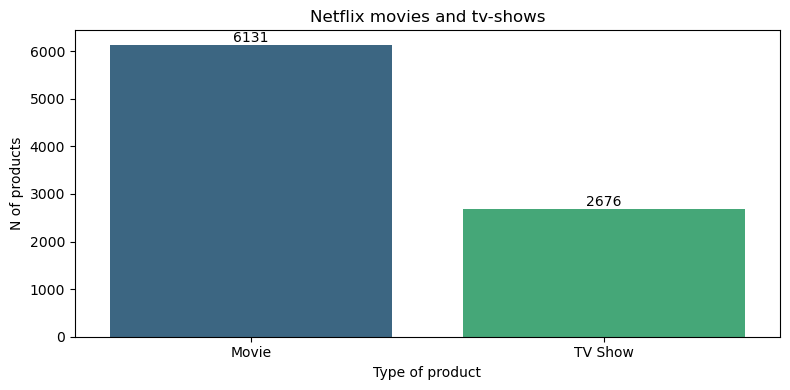

In [228]:
# Lets see the comparision between the two types on a barplot

plt.figure(figsize=(8,4))
sns.barplot(data=net_type, x="type", y="count", palette="viridis")
plt.title("Netflix movies and tv-shows")
plt.xlabel("Type of product")
plt.ylabel("N of products")

for index, value in enumerate(net_type["count"]):
    plt.text(index, value, str(round(value,2)), va="bottom", ha="center", fontsize=10)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Movie lenght distribution</h3>

In [227]:
# Check a describe on the column to see the general information about it 

df["movie_lenght"].describe().round(2)

count    6128.00
mean       99.58
std        28.29
min         3.00
25%        87.00
50%        98.00
75%       114.00
max       312.00
Name: movie_lenght, dtype: float64

In [ ]:
# 